In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Functions to prepare pAnnData

In [161]:
# todo! actually check through these for useful stuff
from typing import List

# check if pep_obs_names and prot_obs_names are the same
def check_obs_names(pdata: pAnnData.pAnnData) -> bool:
    if pdata.prot.obs_names is not None and pdata.pep.obs_names is not None:
        return pdata.prot.obs_names == pdata.pep.obs_names
    else:
        return False
        
def merge(pdata1: pAnnData, pdata2: pAnnData) -> pAnnData:
    # merge two pAnnData objects
    # check if pdata1 and pdata2 have the same obs names
    if check_obs_names(pdata1) and check_obs_names(pdata2):
        # merge pdata1 and pdata2
        prot = pdata1.prot.concatenate(pdata2.prot, join="outer")
        pep = pdata1.pep.concatenate(pdata2.pep, join="outer")
        rs = sparse.vstack([pdata1.rs, pdata2.rs])
        return pAnnData(prot, pep, rs)
    else:
        raise ValueError("Protein and peptide obs names must be the same.")

# Actual import

In [2]:
# test import_proteomeDiscoverer function
pdata = pAnnData.import_proteomeDiscoverer(prot_file='pd_prot.txt', pep_file='pd_pep.txt', obs_columns = ['Sample', 'method', 'duration', 'type'])

--------------------------
Starting import...
--------------------------
Importing from pd_prot.txt
Number of files: 60
Number of proteins: 1571
Number of obs: 4
Importing from pd_pep.txt
Number of files: 60
Number of peptides: 6352
RS matrix successfully computed
Setting rs matrix with dimensions (6352, 1571)
Transposing rs matrix to protein x peptide format
pAnnData object created. Use `print(pdata)` to view the object.


In [5]:
pdata.prot.var_names

Index(['P08238', 'P07900', 'P14618', 'P05787', 'P10809', 'P60709', 'P07437',
       'P11142-1', 'P14618-2', 'P00761',
       ...
       'Q8NI22', 'O60610-1', 'O00743', 'P62310', 'Q9BRQ8-1', 'P35269',
       'P51572', 'Q93052', 'P30040-1', 'P13489'],
      dtype='object', length=1571)

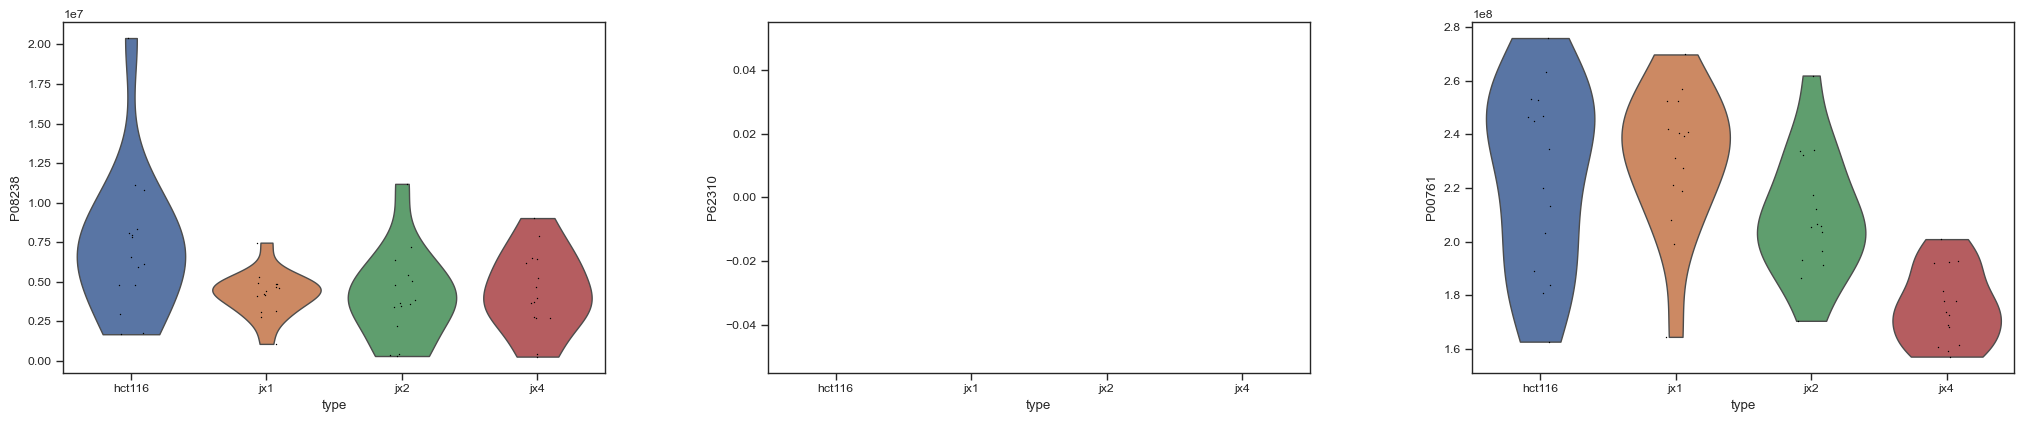

In [15]:
sc.pl.violin(pdata.prot, ["P08238", "P62310", "P00761"], groupby="type")

In [14]:
pdata.prot.obs

,Sample,method,duration,type,protein_quant,protein_count,protein_sum,mbr_count,high_count
F13,Sample,dda,60min,hct116,0.369828,581,3.642020e+08,318,282
F14,Sample,dda,60min,hct116,0.488224,767,5.239205e+08,262,565
F15,Sample,dda,60min,hct116,0.503501,791,4.734084e+08,320,517
F16,Sample,dda,60min,hct116,0.411840,647,5.812131e+08,332,352
F17,Sample,dda,60min,hct116,0.441120,693,3.847497e+08,312,407
F18,Sample,dda,60min,hct116,0.413749,650,4.160325e+08,295,392
F19,Sample,dda,60min,hct116,0.536601,843,4.495343e+08,303,612
F20,Sample,dda,60min,hct116,0.521961,820,4.634452e+08,296,594
F21,Sample,dda,60min,hct116,0.567791,892,4.851906e+08,310,642
F22,Sample,dda,60min,hct116,0.478676,752,3.589501e+08,335,476


In [7]:
pdata.prot[:,'P14618-2']

View of AnnData object with n_obs × n_vars = 60 × 1
    obs: 'Sample', 'method', 'duration', 'type', 'protein_quant', 'protein_count', 'protein_sum', 'mbr_count', 'high_count'
    var: 'Protein FDR Confidence: Combined', 'Master', 'Accession', 'Description', 'Exp. q-value: Combined', 'Sum PEP Score', 'Coverage [%]', '# Peptides', '# PSMs', '# Unique Peptides', '# AAs', 'MW [kDa]', 'calc. pI', 'Score Sequest HT: Sequest HT', '# Peptides (by Search Engine): Sequest HT', 'Biological Process', 'Cellular Component', 'Molecular Function', 'Pfam IDs', 'Entrez Gene ID', 'Genes', 'Gene ID', 'Ensembl Gene ID', 'Reactome Pathways', 'WikiPathways', '# Protein Pathway Groups', '# Razor Peptides'
    layers: 'X_mbr', 'X_raw'

In [4]:
pdata.prot.X

<60x1571 sparse matrix of type '<class 'numpy.float64'>'
	with 94260 stored elements in Compressed Sparse Column format>

In [3]:
pdata.prot.obs

,Sample,method,duration,type,quant,protein_count,mbr_count,high_count
F13,Sample,dda,60min,hct116,0.369828,581,318,282
F14,Sample,dda,60min,hct116,0.488224,767,262,565
F15,Sample,dda,60min,hct116,0.503501,791,320,517
F16,Sample,dda,60min,hct116,0.411840,647,332,352
F17,Sample,dda,60min,hct116,0.441120,693,312,407
F18,Sample,dda,60min,hct116,0.413749,650,295,392
F19,Sample,dda,60min,hct116,0.536601,843,303,612
F20,Sample,dda,60min,hct116,0.521961,820,296,594
F21,Sample,dda,60min,hct116,0.567791,892,310,642
F22,Sample,dda,60min,hct116,0.478676,752,335,476


In [2]:
obs_columns = ['Name','Amt','Enzyme','Date','Instrument','Acquisition','Method','Duration','Replicate']

pdata = pAnnData.import_diann(report_file='report.tsv', obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Importing from report.tsv
Number of files: 10
Number of proteins: 7372
Number of files: 10
Number of peptides: 51510
RS matrix successfully computed
Setting rs matrix with dimensions (51510, 7372)
Transposing rs matrix to protein x peptide format
pAnnData object created. Use `print(pdata)` to view the object.


In [9]:
test_data = pd.read_csv('report.tsv', sep='\t')
test_data['Master.Protein'] = test_data['Protein.Group'].str.split(';')
test_data = test_data.explode('Master.Protein')

In [14]:
test_data[test_data['Protein.Group'] == 'P0DMV8;P0DMV9']

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan,IM,iIM,Predicted.IM,Predicted.iIM,Master.Protein
138,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_A...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;A0A0G2JIW1;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,5275380.0,7699870.0,12390600.0,5275380.0,...,-1.000000e+07,45885.6;4325.05;10912.6;0;8553.33;5298.71;0;0;...,45885.6;4325.05;10912.6;0;8553.33;5298.71;0;0;...,0.816371;0.816497;0.837565;0;0.540003;0.816497...,11927,0,0,0,0,P0DMV8
138,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_A...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;A0A0G2JIW1;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,5275380.0,7699870.0,12390600.0,5275380.0,...,-1.000000e+07,45885.6;4325.05;10912.6;0;8553.33;5298.71;0;0;...,45885.6;4325.05;10912.6;0;8553.33;5298.71;0;0;...,0.816371;0.816497;0.837565;0;0.540003;0.816497...,11927,0,0,0,0,P0DMV9
139,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;A0A0G2JIW1;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,30413100.0,10180600.0,14429800.0,30413100.0,...,-1.000000e+07,33756.8;0;0;0;0;6026.34;0;72155.7;0;0;0;0;,33756.8;0;0;0;0;6026.34;0;72155.7;0;0;0;0;,0.708729;0;0;0;0;0.816497;0;0.408248;0;0;0;0;,12060,0,0,0,0,P0DMV8
139,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;A0A0G2JIW1;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,30413100.0,10180600.0,14429800.0,30413100.0,...,-1.000000e+07,33756.8;0;0;0;0;6026.34;0;72155.7;0;0;0;0;,33756.8;0;0;0;0;6026.34;0;72155.7;0;0;0;0;,0.708729;0;0;0;0;0.816497;0;0.408248;0;0;0;0;,12060,0,0,0,0,P0DMV9
140,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;A0A0G2JIW1;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,4325120.0,17176600.0,13037300.0,4325120.0,...,5.434910e-01,24928.7;2778.41;3611.15;0;3249.37;3963.79;1504...,24928.7;2778.41;3611.15;0;3249.37;3963.79;1504...,0.897224;0.660509;0.544243;0;0.931072;0.912183...,11378,0,0,0,0,P0DMV8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148071,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;P34931;A0A0G2JIW1;Q53FA3;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,23797400.0,8057530.0,8677080.0,23797400.0,...,-1.000000e+07,595454;1.05982e+06;444603;421435;106696;310104;,595454;1.05982e+06;444603;421435;106696;310104;,0.816497;0.910942;0.816497;0.816497;0.816497;0...,16260,0,0,0,0,P0DMV9
148072,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;P34931;A0A0G2JIW1;Q53FA3;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,3004080.0,10262500.0,9953100.0,3004080.0,...,-1.000000e+07,2270.77;1822.4;1394.97;1262.36;1042.7;922.613;,2270.77;1822.4;1394.97;1262.36;1042.7;922.613;,0.816497;0.816497;0.816497;0.816497;0.816497;0...,13454,0,0,0,0,P0DMV8
148072,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;P34931;A0A0G2JIW1;Q53FA3;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,3004080.0,10262500.0,9953100.0,3004080.0,...,-1.000000e+07,2270.77;1822.4;1394.97;1262.36;1042.7;922.613;,2270.77;1822.4;1394.97;1262.36;1042.7;922.613;,0.816497;0.816497;0.816497;0.816497;0.816497;0...,13454,0,0,0,0,P0DMV9
148073,D:\Caltech\caltech-edu_mpangwan\dia-nn\raw\Mar...,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler...,P0DMV8;P0DMV9,P0DMV8;P0DMV9;P34931;A0A0G2JIW1;Q53FA3;V9GZ37,HS71A_HUMAN;HS71B_HUMAN,HSPA1A;HSPA1B,6069960.0,21100600.0,9105860.0,6069960.0,...,-1.000000e+07,167632;233041;117341;140154;27266.7;101913;,1

In [18]:
prot_X_pivot = test_data.pivot_table(index='Master.Protein', columns='Run', values='PG.MaxLFQ', aggfunc='first', sort=False)

In [19]:
prot_X_pivot

Run,Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_03,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler_Aur60min_01
Master.Protein,,,,,,,,,,
P37108,2198290.0,1358900.0,797778.0,3396360.0,1349700.0,1305680.0,797431.0,1420850.0,2520060.0,4875180.0
P36578,12126800.0,13718900.0,11877800.0,14920200.0,13525200.0,14792400.0,8405800.0,7274880.0,6849030.0,33622500.0
Q9H9P5,NaN,NaN,NaN,31458.6,NaN,NaN,NaN,NaN,43120.5,NaN
A6NIH7,198718.0,104023.0,118067.0,188288.0,147581.0,111386.0,144675.0,214028.0,48465.4,NaN
Q9P258,1989350.0,2403660.0,2927870.0,1958720.0,2400130.0,2154160.0,2718560.0,1921520.0,2671990.0,2284080.0
...,...,...,...,...,...,...,...,...,...,...
Q9GZM8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12590.0
Q9UK99,NaN,NaN,NaN,261825.0,NaN,NaN,116261.0,184759.0,NaN,NaN
H0YCP8,NaN,22345.4,NaN,NaN,NaN,12528.0,NaN,NaN,NaN,NaN


In [17]:
prot_var_columns = ['Genes', 'Master.Protein']
prot_var = test_data.loc[:, prot_var_columns].drop_duplicates(subset='Master.Protein').drop(columns='Master.Protein')

prot_var

,Genes
0,SRP14
17,RPL4
31,UNKL
33,UNC119B
42,RCC2
...,...
189373,NDEL1
189566,FBXO3
189645,PUF60
189753,PRMT7


# debugging

In [5]:
pdata.prot.var

,First.Protein.Description,Genes
A0A075B6F9,Signal recognition particle 14 kDa protein,SRP14
A0A087WU03,60S ribosomal protein L4,RPL4
A0A087WUJ8,Putative E3 ubiquitin-protein ligase UNKL,UNKL
A0A087WVV7,Protein unc-119 homolog B,UNC119B
A0A087WVZ6,Protein RCC2,RCC2
...,...,...
S6AU73,Nuclear distribution protein nudE-like 1,NDEL1
U3KQF3,F-box only protein 3,FBXO3
U3KQN7,Poly(U)-binding-splicing factor PUF60 (Fragment),PUF60
V9GYT7,Protein arginine N-methyltransferase 7,PRMT7


In [6]:
pdata.pep.var

,Genes,Modified.Sequence,Stripped.Sequence
AAAAAAAAAPAAAATAPTTAATTAATAAQ2,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ
AAAAAAAAAPAAAATAPTTAATTAATAAQ3,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ
AAAAAAAAAPAAAATAPTTAATTAATAAQ4,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ
AAAAAAALQAK1,RPL4,AAAAAAALQAK,AAAAAAALQAK
AAAAAAALQAK2,RPL4,AAAAAAALQAK,AAAAAAALQAK
...,...,...,...
YYVTIIDAPGHRDFIK4,EEF1A1;EEF1A1P5,YYVTIIDAPGHRDFIK,YYVTIIDAPGHRDFIK
YYYIPQYK1,NDUFAF2,YYYIPQYK,YYYIPQYK
YYYIPQYK2,NDUFAF2,YYYIPQYK,YYYIPQYK
YYYQLNSK1,CBX4,YYYQLNSK,YYYQLNSK


In [2]:
report_all = pd.read_csv('report.tsv', sep='\t')